In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np

def plot_best_config_csv(filename, num_configs=16):
    """
    Reads a CSV with columns [g, K, winning_config]
    and plots a color phase diagram.
    """
    # Load CSV
    df = pd.read_csv(filename)
    
    # Sort unique g and K values
    g_vals = sorted(df["g"].unique())
    K_vals = sorted(df["k"].unique())
    
    # Pivot into 2D grid (rows = K, columns = g)
    grid = df.pivot(index="k", columns="g", values="winning_config")
    
    # Create a discrete colormap with 16 colors
    cmap = plt.get_cmap("tab20", num_configs)  # tab20 has 20 distinct colors
    
    # Plot
    fig, ax = plt.subplots(figsize=(7, 6))
    im = ax.imshow(
        grid.values,
        origin="lower",
        extent=[min(g_vals), max(g_vals), min(K_vals), max(K_vals)],
        aspect="auto",
        cmap=cmap,
        interpolation="nearest"
    )
    
    # Labels and title
    ax.set_xlabel("g value")
    ax.set_ylabel("K value")
    ax.set_title("Winning Configuration Map")

    # Colorbar
    cbar = plt.colorbar(im, ax=ax, ticks=range(num_configs))
    cbar.set_label("Winning Config (bestnumber)")

    plt.tight_layout()
    plt.show()


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def plot_best_config_csv2(filename, num_configs=16, round_digits=3):
    """
    Reads a CSV with columns [g, K, winning_config]
    and plots a color phase diagram.

    Args:
        filename: path to CSV
        num_configs: number of discrete configuration colors
        round_digits: how many decimals to round g,K to avoid float mismatch
    """
    # Load CSV
    df = pd.read_csv(filename)
    
    # Ensure consistent naming
    if "K" in df.columns:
        df.rename(columns={"K": "k"}, inplace=True)
    elif "k" not in df.columns:
        raise ValueError("CSV must contain 'K' or 'k' column")

    # Round to fix float precision issues
    df["g"] = df["g"].round(round_digits)
    df["k"] = df["k"].round(round_digits)

    # Get sorted unique axes
    g_vals = np.sort(df["g"].unique())
    k_vals = np.sort(df["k"].unique())

    # Create an empty grid
    grid = np.full((len(k_vals), len(g_vals)), np.nan)

    # Fill the grid with winning_config values
    for _, row in df.iterrows():
        i = np.where(k_vals == row["k"])[0][0]
        j = np.where(g_vals == row["g"])[0][0]
        grid[i, j] = row["winning_config"]

    # Create discrete colormap
    cmap = plt.get_cmap("tab20", num_configs)

    # Plot
    fig, ax = plt.subplots(figsize=(7, 6))
    im = ax.imshow(
        grid,
        origin="lower",
        extent=[min(g_vals), max(g_vals), min(k_vals), max(k_vals)],
        aspect="auto",
        cmap=cmap,
        interpolation="nearest"
    )

    # Labels and title
    ax.set_xlabel("g value")
    ax.set_ylabel("K value")
    ax.set_title("Winning Configuration Map")

    # Colorbar
    cbar = plt.colorbar(im, ax=ax, ticks=range(num_configs))
    cbar.set_label("Winning Config (bestnumber)")

    plt.tight_layout()
    plt.show()


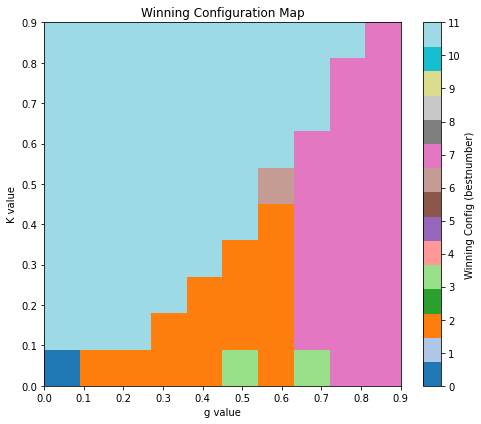

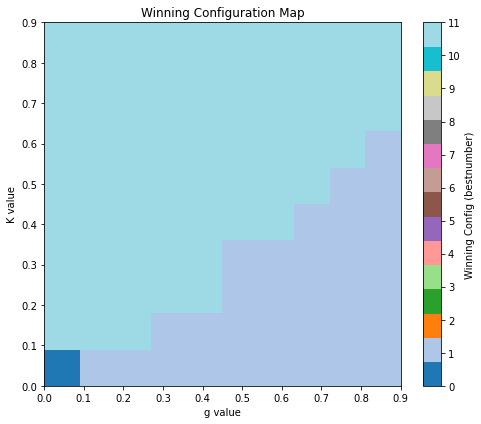

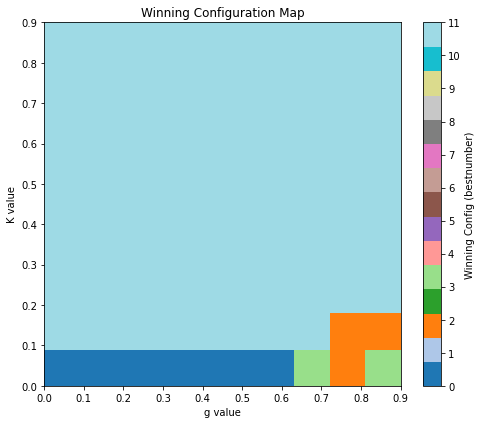

In [8]:
plot_best_config_csv("phase_results_100point_0.25.csv", num_configs=15)
plot_best_config_csv("phase_results_100point_0.5.csv", num_configs=15)
plot_best_config_csv("phase_results_100point_0.3333333333333333.csv", num_configs=15)


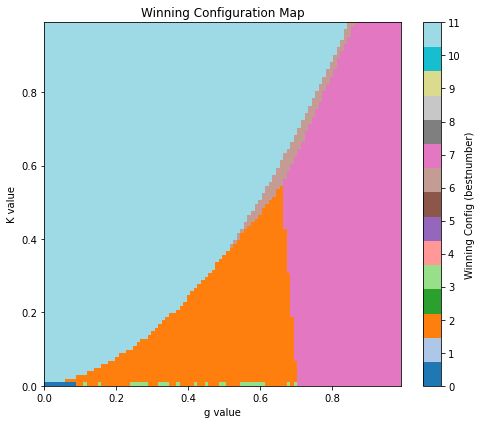

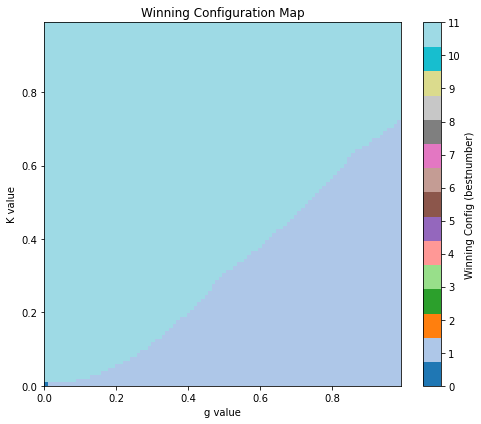

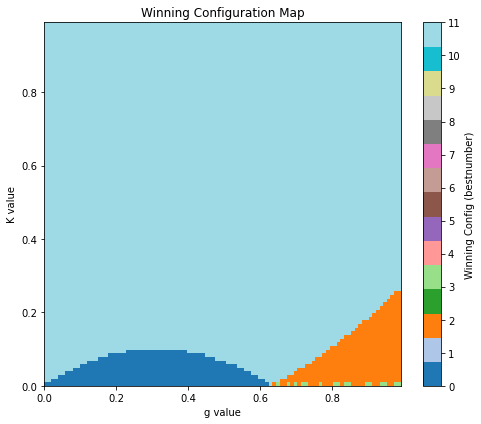

In [10]:
plot_best_config_csv("phase_results_1000point_0.25.csv", num_configs=15)
plot_best_config_csv("phase_results_1000point_0.5.csv", num_configs=15)
plot_best_config_csv("phase_results_1000point_0.3333333333333333.csv", num_configs=15)

<ipython-input-7-81aafbf3f72c>:46: UserWarning: Attempting to set identical bottom == top == 0.5 results in singular transformations; automatically expanding.
  im = ax.imshow(


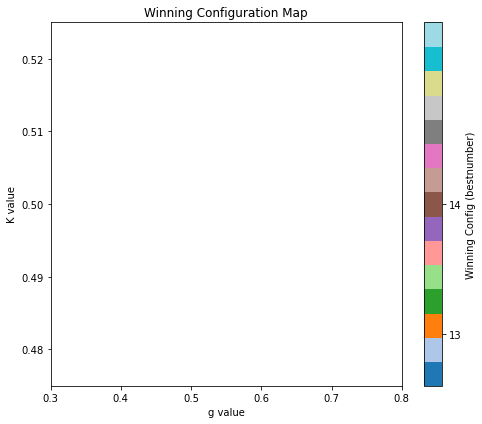

In [8]:
plot_best_config_csv2("phase_results_ZoomgkpointTEST_0.25.csv", num_configs=15)
# plot_best_config_csv("phase_results_1000point_0.5.csv", num_configs=15)
# plot_best_config_csv("phase_results_1000point_0.3333333333333333.csv", num_configs=15)

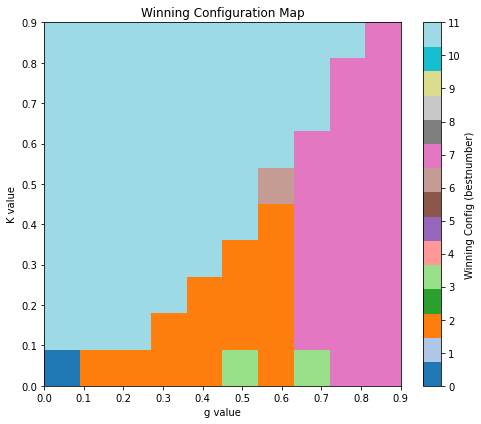

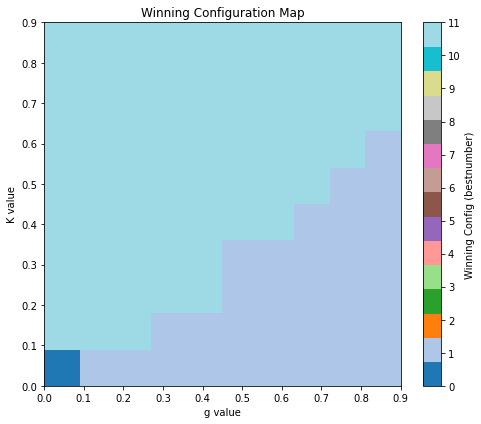

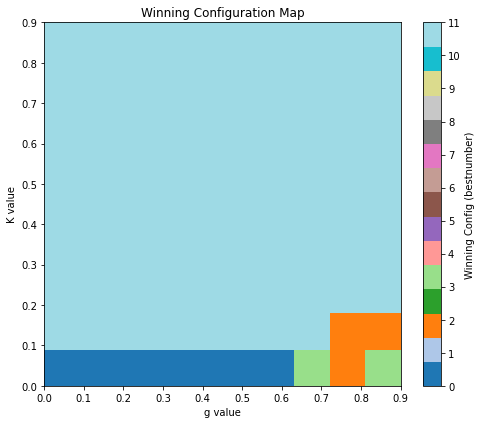

In [9]:
plot_best_config_csv2("phase_results_100point_0.25.csv", num_configs=15)
plot_best_config_csv2("phase_results_100point_0.5.csv", num_configs=15)
plot_best_config_csv2("phase_results_100point_0.3333333333333333.csv", num_configs=15)